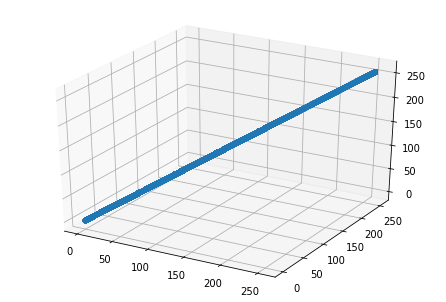

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = cv2.imread("Data/0-Cavity/10.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
original_image = cv2.imread("Data/0-Cavity/10.jpg")

In [8]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [9]:
vectorized = img.reshape((-1,3))

In [10]:
vectorized = np.float32(vectorized)

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [12]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [13]:
center = np.uint8(center)

In [14]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

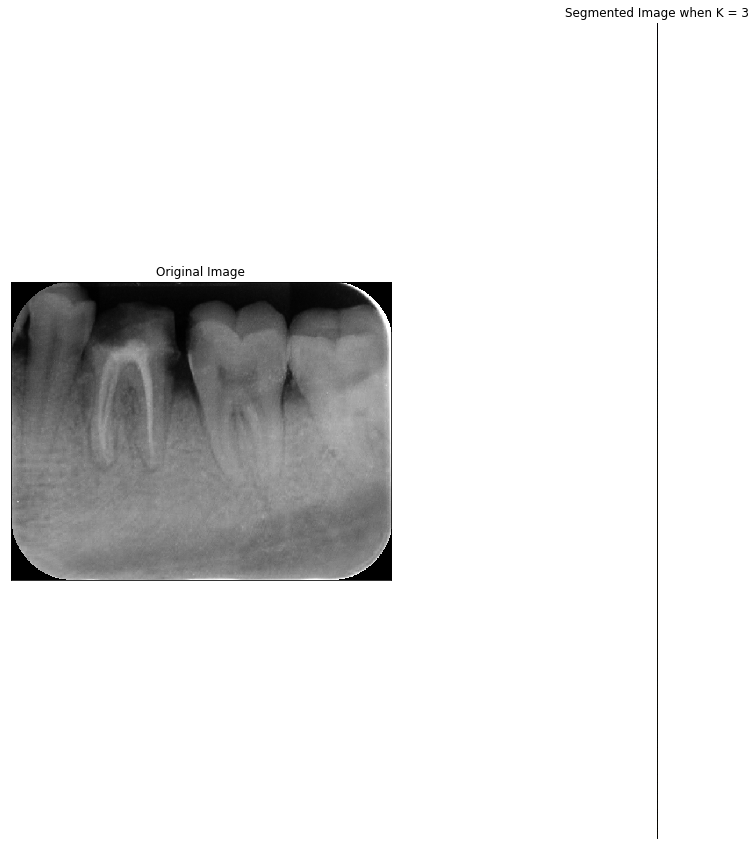

In [18]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

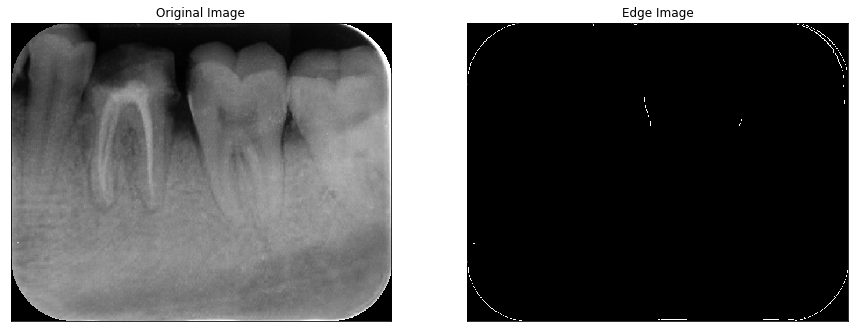

In [20]:
edges = cv2.Canny(img,150,250)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [33]:
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [34]:
I = Image.open("Data/0-Cavity/10.jpg")

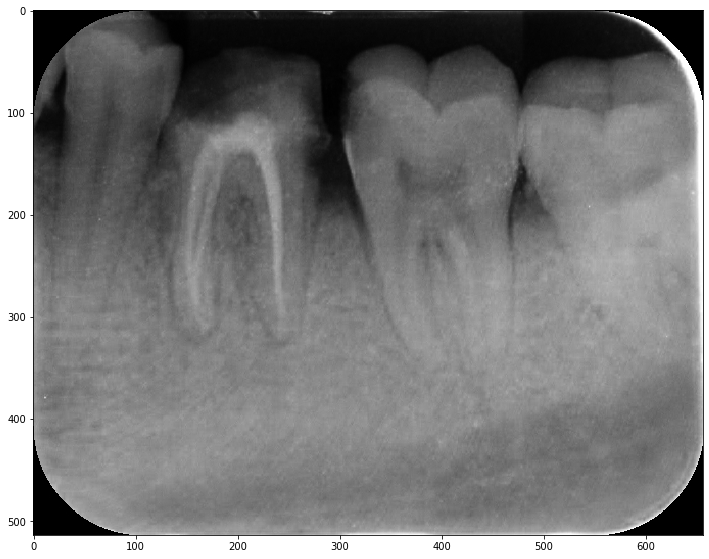

In [35]:
a = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(a)
plt.axis('on')
plt.show()

In [36]:
w, h = I.size
colors = I.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h 

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  337184
Number of colors =  256


In [37]:
x, y, z = a.shape
print('a shape ', a.shape)

a1 = a.reshape(x*y, z)
print('a1 shape ', a1.shape)

a shape  (514, 656, 3)
a1 shape  (337184, 3)


In [50]:
n = 10
k_means = KMeans(n_clusters=n)
k_means.fit(a1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
centroids = k_means.cluster_centers_
labels = k_means.labels_

In [52]:
print('centroids shape ', centroids.shape)
print('labels shape ', labels.shape)

centroids shape  (10, 3)
labels shape  (337184,)


In [53]:
a2 = centroids[labels]
print('a2 shape ', a2.shape)

a3 = a2.reshape(x,y,z)
print('a3 shape ', a3.shape)

a2 shape  (337184, 3)
a3 shape  (514, 656, 3)


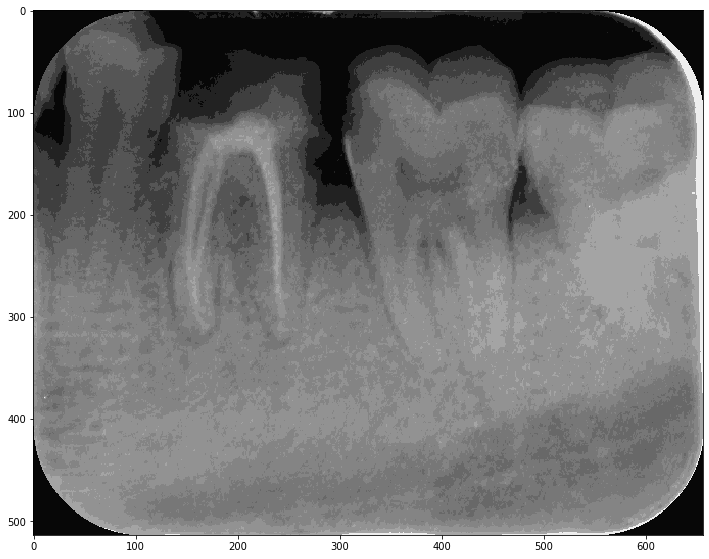

In [54]:
plt.figure(figsize=(12,12))
plt.imshow(a3)
plt.axis('on')
plt.show()

In [55]:
a4 = np.floor(a3*255)
a5 = a4.astype(np.uint8)

I1 = Image.fromarray(a5)
I1.save("Data/0-Cavity/10.jpg")

In [56]:
w, h = I1.size
colors = I1.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h 

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  337184
Number of colors =  10


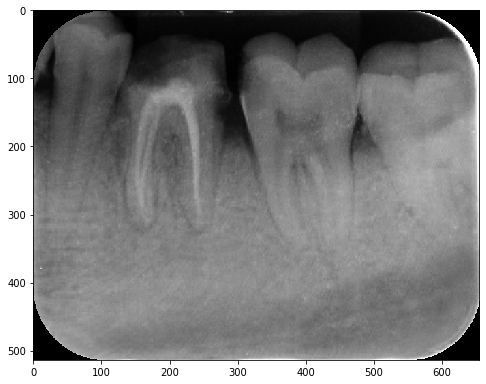

In [61]:
plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('on')
plt.show()

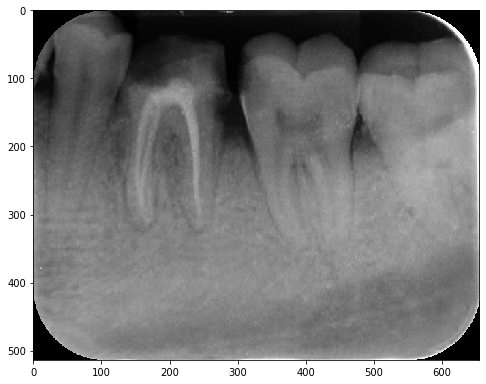

In [62]:
I1 = I.convert('L')
a = np.asarray(I1,dtype=np.float)

plt.figure(figsize=(8,8))
plt.imshow(a,cmap='gray')
plt.axis('on')
plt.show()

In [63]:
x , y = a.shape
print('a shape ', a.shape)

a1 = a.reshape(x*y,1)
print('a1 shape ', a1.shape)

a shape  (514, 656)
a1 shape  (337184, 1)


In [69]:
k_means = KMeans(n_clusters=5)
k_means.fit(a1) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
centroids = k_means.cluster_centers_
labels = k_means.labels_

In [71]:

a2 = centroids[labels]
print('a2 shape ', a2.shape)

a2 shape  (337184, 1)


In [72]:
a3 = a2.reshape(x, y)
print('a3 shape ', a3.shape)

a3 shape  (514, 656)


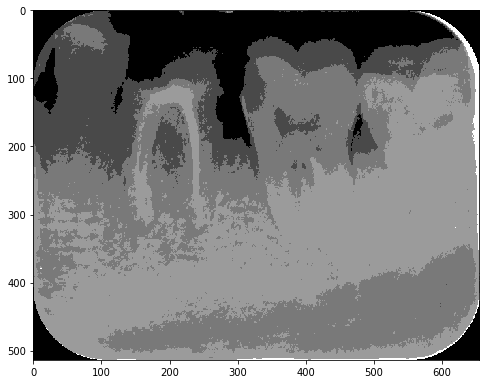

In [73]:
plt.figure(figsize=(8,8))
plt.imshow(a3,cmap='gray')
plt.axis('on')
plt.show()

In [74]:
a4 = (a3 -  np.min(a3))/(np.max(a3)-np.min(a3))*255
a5 = a4.astype(np.uint8)
I2 = Image.fromarray(a5)
w, h =I2.size
colors = I2.getcolors(w * h)
print(colors)

[(44996, 0), (50737, 73), (110254, 122), (127781, 154), (3416, 255)]


In [76]:
print ('Area = ',  float(210000)*float(colors[0][0])/float(w*h))

Area =  28023.749644111227


In [77]:
import tensorflow as tf

In [82]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [92]:
import pathlib
dataset_url = "Data/0-Cavity"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

ValueError: unknown url type: 'Data/0-Cavity'

In [91]:
roses = list(data_dir.glob('Data/0-Cavity/*'))
PIL.Image.open(str(roses[10]))

NameError: name 'data_dir' is not defined

In [83]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [84]:
@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [85]:
def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [86]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

NameError: name 'info' is not defined